In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
from tqdm import tqdm 
import numpy as np 
from IPython.display import display

In [2]:
flist = pd.read_csv('flist_v3' , names = ['name'])
flist 

,name
0,2CXO J000002.8-251139.csv
1,2CXO J000002.9-350332.csv
2,2CXO J000009.3+135618.csv
3,2CXO J000015.4+005246.csv
4,2CXO J000021.0-250812.csv
...,...
10351,2CXO J235933.4-250758.csv
10352,2CXO J235939.7-250056.csv
10353,2CXO J235953.4-093655.csv
10354,2CXO J235953.6-124148.csv


In [3]:
seta = set(pd.read_csv('multi_wave_data/'+flist['name'][0])['Frequency'].to_list())
setb = set(pd.read_csv('multi_wave_data/'+flist['name'][3])['Frequency'].to_list())
print(seta)
print(setb)

{9.19e+17, 5.56e+17, 9.67e+16, 2.22e+17, 3.77e+17}
{5.56e+17, 3.77e+17, 9.67e+16, 2.22e+17, 1950000000000000.0, 1760000000000000.0, 1290000000000000.0, 836000000000000.0, 617000000000000.0, 477000000000000.0, 389000000000000.0, 65100000000000.0, 89400000000000.0, 25900000000000.0, 13600000000000.0, 325000000000000.0}


# Extract all frequencies available

In [4]:
li = []
for f in tqdm(flist['name'][:]):
    df = pd.read_csv('multi_wave_data/'+f)
    name = df['Observed Passband']
    freq = df['Frequency']
    unit = df['Units'] 
    df = pd.DataFrame({
        "band" : name ,
        "freq" : freq ,
        "unit" : unit, 
    })
    df = df.drop_duplicates()
    #display(df)
    li.append(df)
df = pd.concat(li , axis=0 , ignore_index = True)
df = pd.DataFrame(df)


100%|██████████| 10356/10356 [01:25<00:00, 120.98it/s]


In [5]:
df = df.drop_duplicates(subset = ['freq'])
display(df)
    #print(len(temp))
    #freq_val = freq_val.union(temp)
#display(freq_val)
#print(len(freq_val))

,band,freq,unit
0,2-7 keV Chandra,9.190000e+17,erg/cm^2/s
1,0.5-7 keV Chandra,5.560000e+17,erg/cm^2/s
2,1.2-2 keV Chandra,3.770000e+17,erg/cm^2/s
3,0.5-1.2 keV Chandra,2.220000e+17,erg/cm^2/s
4,0.2-0.5 keV Chandra,9.670000e+16,erg/cm^2/s
...,...,...,...
253250,238 GHz (ESO),2.380000e+11,Jy
255004,863 MHz (ASKAP),8.630000e+08,milliJy
255818,2.14 mm (NIKA),1.400000e+11,milliJy
257424,0.3-1 keV (XMM),1.570000e+17,erg/cm^2^/s


In [6]:
df = df.reset_index(drop=True)
display(df)
df.to_csv('freq_list.csv')

,band,freq,unit
0,2-7 keV Chandra,9.190000e+17,erg/cm^2/s
1,0.5-7 keV Chandra,5.560000e+17,erg/cm^2/s
2,1.2-2 keV Chandra,3.770000e+17,erg/cm^2/s
3,0.5-1.2 keV Chandra,2.220000e+17,erg/cm^2/s
4,0.2-0.5 keV Chandra,9.670000e+16,erg/cm^2/s
...,...,...,...
1240,238 GHz (ESO),2.380000e+11,Jy
1241,863 MHz (ASKAP),8.630000e+08,milliJy
1242,2.14 mm (NIKA),1.400000e+11,milliJy
1243,0.3-1 keV (XMM),1.570000e+17,erg/cm^2^/s


In [52]:
for i in np.arange(5,30):
    tdf = pd.read_csv('multi_wave_data/'+flist['name'][i])
    #tdf = tdf[tdf['Frequency']==556000000000000000]
    if(len(tdf)>30):
        print(flist['name'][i])
        display(tdf)
        #break

2CXO J000026.1-250651.csv


,Unnamed: 0,No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,...,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
0,0,1,2-10 keV (XMM),8.000000e-15,NaN,erg/cm^2^/s,1.450000e+18,5.520000e-10,NaN,NaN,...,NaN,Jy,2004A&A...421..491P,no uncertainty reported,6 keV,Broad-band measurement,NaN,From fitting to map,NaN,From new raw data; Extinction-corrected for Mi...
1,1,2,2-10 keV (XMM),8.000000e-15,NaN,erg/cm^2^/s,1.450000e+18,5.520000e-10,NaN,NaN,...,NaN,Jy,2004A&A...421..491P,no uncertainty reported,6 keV,Broad-band measurement,NaN,From fitting to map,Observed flux,From new raw data; NED frequency assigned to m...
2,2,3,2-10 keV (XMM),2.027000e-14,+/-2.5610E-15,erg/cm^2^/s,1.450000e+18,1.400000e-09,1.770000e-10,1.770000e-10,...,+/-1.77E-10,Jy,2007A&A...469...27C,1 sigma,6.00 keV,Broad-band measurement,000.108477 -25.113909 (J2000),From fitting to map,NaN,From new raw data; NED frequency assigned to m...
3,3,4,4.5-7.5 keV (XMM),7.649000e-15,+/-1.0870E-15,erg/cm^2^/s,1.450000e+18,5.280000e-10,7.500000e-11,7.500000e-11,...,+/-7.50E-11,Jy,2007A&A...469...27C,1 sigma,6.00 keV,Broad-band measurement,000.108477 -25.113909 (J2000),From fitting to map,NaN,From new raw data; NED frequency assigned to m...
4,4,5,0.5-10 keV (XMM),2.870000e-14,+/-1.728E-15,erg/cm^2^/s,1.270000e+18,2.260000e-09,1.360000e-10,1.360000e-10,...,+/-1.36E-10,Jy,2007A&A...469...27C,1 sigma,5.25 keV,Broad-band measurement,000.108477 -25.113909 (J2000),From fitting to map,NaN,From new raw data; NED frequency assigned to m...
5,5,6,2-7 keV Chandra,NaN,<5.4083E-14,erg/cm^2/s,9.190000e+17,NaN,NaN,NaN,...,<5.89E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper,From new raw data
6,6,7,2-7 keV Chandra,NaN,<5.4083E-14,erg/cm^2/s,9.190000e+17,NaN,NaN,NaN,...,<5.89E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg,From new raw data
7,7,8,2-7 keV Chandra,NaN,<5.9694E-14,erg/cm^2/s,9.190000e+17,NaN,NaN,NaN,...,<6.50E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90,From new raw data
8,8,9,2-7 keV Chandra,NaN,<5.9694E-14,erg/cm^2/s,9.190000e+17,NaN,NaN,NaN,...,<6.50E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg,From new raw data
9,9,10,0.5-4.5 keV (XMM),1.768000e-14,+/-1.0850E-15,erg/cm^2^/s,6.050000e+17,2.920000e-09,1.790000e-10,1.790000e-10,...,+/-1.79E-10,Jy,2007A&A...469...27C,1 sigma,2.50 keV,Broad-band measurement,000.108477 -25.113909 (J2000),From fitting to map,NaN,From new raw data; NED frequency assigned to m...


2CXO J000026.2+134604.csv


,Unnamed: 0,No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,...,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
0,0,1,2-7 keV Chandra,8.870900e-14,+/-7.7138E-14,erg/cm^2/s,9.190000e+17,9.650000e-09,8.400000e-09,8.400000e-09,...,+/-8.40E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper,From new raw data
1,1,2,2-7 keV Chandra,8.870900e-14,+/-7.7138E-14,erg/cm^2/s,9.190000e+17,9.650000e-09,8.400000e-09,8.400000e-09,...,+/-8.40E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg,From new raw data
2,2,3,2-7 keV Chandra,1.311400e-13,+/-8.5917E-14,erg/cm^2/s,9.190000e+17,1.430000e-08,9.350000e-09,9.350000e-09,...,+/-9.35E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90,From new raw data
3,3,4,2-7 keV Chandra,1.311400e-13,+/-8.5917E-14,erg/cm^2/s,9.190000e+17,1.430000e-08,9.350000e-09,9.350000e-09,...,+/-9.35E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg,From new raw data
4,4,5,0.5-7 keV Chandra,1.381700e-13,+/-1.9496E-14,erg/cm^2/s,5.560000e+17,2.480000e-08,3.510000e-09,3.510000e-09,...,+/-3.51E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper,From new raw data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,58,59,W3 (WISE),1.180700e+01,+/-0.397,mag,2.590000e+13,6.000000e-04,2.190000e-04,2.190000e-04,...,+/-2.19E-04,Jy,2013wise.rept....1C,uncertainty,11.5608 microns,Broad-band measurement,NaN,Flux in fixed aperture,"r=8.25"" COG-corrected",From new raw data; Uncorrected for known sourc...
59,59,60,W3 (WISE),NaN,>11.355,mag,2.590000e+13,NaN,NaN,NaN,...,<9.09E-04,Jy,2013wise.rept....1C,95% confidence,11.5608 microns,Broad-band measurement,NaN,Flux in fixed aperture,"r=22.0"" aperture",From new raw data
60,60,61,W4 (WISE),NaN,>8.13,mag,1.360000e+13,NaN,NaN,NaN,...,<4.68E-03,Jy,2013wise.rept....1C,95% confidence,22.0883 microns,Broad-band measurement,NaN,Flux in fixed aperture,"r=22.0"" aperture",From new raw data
61,61,62,W4 (WISE),NaN,>8.256,mag,1.360000e+13,NaN,NaN,NaN,...,<4.17E-03,Jy,2013wise.rept....1C,95% confidence,22.0883 microns,Broad-band measurement,NaN,From fitting to map,Profile-fit,From new raw data


2CXO J000031.8-245458.csv


,Unnamed: 0,No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,...,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
0,0,1,2-10 keV (XMM),7.800000e-14,NaN,erg/cm^2^/s,1.450000e+18,5.380000e-09,NaN,NaN,...,NaN,Jy,2004A&A...421..491P,no uncertainty reported,6 keV,Broad-band measurement,NaN,From fitting to map,Observed flux,From new raw data; NED frequency assigned to m...
1,1,2,2-10 keV (XMM),7.800000e-14,NaN,erg/cm^2^/s,1.450000e+18,5.380000e-09,NaN,NaN,...,NaN,Jy,2004A&A...421..491P,no uncertainty reported,6 keV,Broad-band measurement,NaN,From fitting to map,NaN,From new raw data; Extinction-corrected for Mi...
2,2,3,2-7 keV Chandra,2.073600e-14,+/-2.0736E-14,erg/cm^2/s,9.190000e+17,2.260000e-09,2.260000e-09,2.260000e-09,...,+/-2.26E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper,From new raw data
3,3,4,2-7 keV Chandra,2.073600e-14,+/-2.0736E-14,erg/cm^2/s,9.190000e+17,2.260000e-09,2.260000e-09,2.260000e-09,...,+/-2.26E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg,From new raw data
4,4,5,2-7 keV Chandra,NaN,<1.6573E-14,erg/cm^2/s,9.190000e+17,NaN,NaN,NaN,...,<1.80E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90,From new raw data
5,5,6,2-7 keV Chandra,NaN,<1.6573E-14,erg/cm^2/s,9.190000e+17,NaN,NaN,NaN,...,<1.80E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg,From new raw data
6,6,7,0.5-7 keV Chandra,5.741700e-14,+/-6.6683E-15,erg/cm^2/s,5.560000e+17,1.030000e-08,1.200000e-09,1.200000e-09,...,+/-1.20E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper,From new raw data
7,7,8,0.5-7 keV Chandra,5.741700e-14,+/-6.6683E-15,erg/cm^2/s,5.560000e+17,1.030000e-08,1.200000e-09,1.200000e-09,...,+/-1.20E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg,From new raw data
8,8,9,0.5-7 keV Chandra,4.736700e-14,+/-5.1383E-15,erg/cm^2/s,5.560000e+17,8.520000e-09,9.240000e-10,9.240000e-10,...,+/-9.24E-10,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90,From new raw data
9,9,10,0.5-7 keV Chandra,4.736700e-14,+/-5.1383E-15,erg/cm^2/s,5.560000e+17,8.520000e-09,9.240000e-10,9.240000e-10,...,+/-9.24E-10,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg,From new raw data


2CXO J000111.1-100155.csv


,Unnamed: 0,No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,...,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
0,0,1,0.3-8 keV (Chandra),1.200000e-13,NaN,erg/cm^2^/s,1.000000e+18,1.200000e-08,NaN,NaN,...,NaN,Jy,2016ApJS..224...40W,no uncertainty reported,4.15 keV,Broad-band measurement,NaN,Flux integrated from map,Average flux,From reprocessed raw data; NED frequency assig...
1,1,2,0.5-7 keV Chandra,8.052700e-14,+/-1.9522E-14,erg/cm^2/s,5.560000e+17,1.450000e-08,3.510000e-09,3.510000e-09,...,+/-3.51E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper,From new raw data
2,2,3,0.5-7 keV Chandra,8.052700e-14,+/-1.9522E-14,erg/cm^2/s,5.560000e+17,1.450000e-08,3.510000e-09,3.510000e-09,...,+/-3.51E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg,From new raw data
3,3,4,0.5-7 keV Chandra,7.709600e-14,+/-2.0479E-14,erg/cm^2/s,5.560000e+17,1.390000e-08,3.680000e-09,3.680000e-09,...,+/-3.68E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90,From new raw data
4,4,5,0.5-7 keV Chandra,7.709600e-14,+/-2.0479E-14,erg/cm^2/s,5.560000e+17,1.390000e-08,3.680000e-09,3.680000e-09,...,+/-3.68E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg,From new raw data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,71,72,W3 (WISE),1.080300e+01,+/-0.195,mag,2.590000e+13,1.510000e-03,2.720000e-04,2.720000e-04,...,+/-2.72E-04,Jy,2013wise.rept....1C,uncertainty,11.5608 microns,Broad-band measurement,NaN,Flux in fixed aperture,"r=22.0"" aperture",From new raw data; Uncorrected for known sourc...
72,72,73,W3 (WISE),1.045500e+01,+/-0.112,mag,2.590000e+13,2.080000e-03,2.150000e-04,2.150000e-04,...,+/-2.15E-04,Jy,2013wise.rept....1C,uncertainty,11.5608 microns,Broad-band measurement,NaN,Flux in fixed aperture,"r=8.25"" COG-corrected",From new raw data; Uncorrected for known sourc...
73,73,74,W4 (WISE),7.776000e+00,+/-0.204,mag,1.360000e+13,6.490000e-03,1.220000e-03,1.220000e-03,...,+/-1.22E-03,Jy,2013wise.rept....1C,uncertainty,22.0883 microns,Broad-band measurement,NaN,From fitting to map,Profile-fit,From new raw data
74,74,75,W4 (WISE),7.767000e+00,+/-0.327,mag,1.360000e+13,6.540000e-03,1.970000e-03,1.970000e-03,...,+/-1.97E-03,Jy,2013wise.rept....1C,uncertainty,22.0883 microns,Broad-band measurement,NaN,Flux in fixed aperture,"r=16.5"" COG-corrected",From new raw data; Uncorrected for known sourc...


2CXO J000122.6-250017.csv


,Unnamed: 0,No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,...,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
0,0,1,2-10 keV (XMM),1.450000e-13,NaN,erg/cm^2^/s,1.450000e+18,1.000000e-08,NaN,NaN,...,NaN,Jy,2004A&A...421..491P,no uncertainty reported,6 keV,Broad-band measurement,NaN,From fitting to map,Observed flux,From new raw data; NED frequency assigned to m...
1,1,2,2-10 keV (XMM),1.450000e-13,NaN,erg/cm^2^/s,1.450000e+18,1.000000e-08,NaN,NaN,...,NaN,Jy,2004A&A...421..491P,no uncertainty reported,6 keV,Broad-band measurement,NaN,From fitting to map,NaN,From new raw data; Extinction-corrected for Mi...
2,2,3,0.3-8 keV (Chandra),4.010000e-13,NaN,erg/cm^2^/s,1.000000e+18,4.010000e-08,NaN,NaN,...,NaN,Jy,2016ApJS..224...40W,no uncertainty reported,4.15 keV,Broad-band measurement,NaN,Flux integrated from map,Average flux,From reprocessed raw data; NED frequency assig...
3,3,4,2-7 keV Chandra,3.218600e-12,+/-1.1495E-12,erg/cm^2/s,9.190000e+17,3.500000e-07,1.250000e-07,1.250000e-07,...,+/-1.25E-07,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper,From new raw data
4,4,5,2-7 keV Chandra,3.218600e-12,+/-1.1495E-12,erg/cm^2/s,9.190000e+17,3.500000e-07,1.250000e-07,1.250000e-07,...,+/-1.25E-07,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg,From new raw data
5,5,6,2-7 keV Chandra,2.861100e-14,+/-1.1094E-14,erg/cm^2/s,9.190000e+17,3.110000e-09,1.210000e-09,1.210000e-09,...,+/-1.21E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90,From new raw data
6,6,7,2-7 keV Chandra,2.861100e-14,+/-1.1094E-14,erg/cm^2/s,9.190000e+17,3.110000e-09,1.210000e-09,1.210000e-09,...,+/-1.21E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg,From new raw data
7,7,8,0.5-7 keV Chandra,2.324200e-13,+/-9.1983E-15,erg/cm^2/s,5.560000e+17,4.180000e-08,1.650000e-09,1.650000e-09,...,+/-1.65E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper,From new raw data
8,8,9,0.5-7 keV Chandra,2.324200e-13,+/-9.1983E-15,erg/cm^2/s,5.560000e+17,4.180000e-08,1.650000e-09,1.650000e-09,...,+/-1.65E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg,From new raw data
9,9,10,0.5-7 keV Chandra,2.386300e-13,+/-9.7165E-15,erg/cm^2/s,5.560000e+17,4.290000e-08,1.750000e-09,1.750000e-09,...,+/-1.75E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90,From new raw data


2CXO J000201.9+004541.csv


,Unnamed: 0,No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,...,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
0,0,1,0.5-8 keV (Chandra),-1.296000e+01,NaN,log(erg/cm^2^/s),1.030000e+18,1.060000e-08,NaN,NaN,...,NaN,Jy,2009ApJ...690..644G,no uncertainty reported,4.25 keV,Broad-band measurement,0.50832 0.761275 (J2000),Flux integrated from map,NaN,From new raw data; NED frequency assigned to m...
1,1,2,2-7 keV Chandra,NaN,<2.7753E-14,erg/cm^2/s,9.190000e+17,NaN,NaN,NaN,...,<3.02E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;var,From new raw data
2,2,3,2-7 keV Chandra,NaN,<2.7753E-14,erg/cm^2/s,9.190000e+17,NaN,NaN,NaN,...,<3.02E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;var,From new raw data
3,3,4,2-7 keV Chandra,NaN,<3.0713E-14,erg/cm^2/s,9.190000e+17,NaN,NaN,NaN,...,<3.34E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90;var,From new raw data
4,4,5,2-7 keV Chandra,NaN,<3.0713E-14,erg/cm^2/s,9.190000e+17,NaN,NaN,NaN,...,<3.34E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg;var,From new raw data
5,5,6,0.5-7 keV Chandra,9.971000e-14,+/-1.9942E-14,erg/cm^2/s,5.560000e+17,1.790000e-08,3.590000e-09,3.590000e-09,...,+/-3.59E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;var,From new raw data
6,6,7,0.5-7 keV Chandra,9.971000e-14,+/-1.9942E-14,erg/cm^2/s,5.560000e+17,1.790000e-08,3.590000e-09,3.590000e-09,...,+/-3.59E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;var,From new raw data
7,7,8,0.5-7 keV Chandra,9.890500e-14,+/-2.0231E-14,erg/cm^2/s,5.560000e+17,1.780000e-08,3.640000e-09,3.640000e-09,...,+/-3.64E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90;var,From new raw data
8,8,9,0.5-7 keV Chandra,9.890500e-14,+/-2.0231E-14,erg/cm^2/s,5.560000e+17,1.780000e-08,3.640000e-09,3.640000e-09,...,+/-3.64E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg;var,From new raw data
9,9,10,1.2-2 keV Chandra,1.832600e-14,+/-6.1087E-15,erg/cm^2/s,3.770000e+17,4.860000e-09,1.620000e-09,1.620000e-09,...,+/-1.62E-09,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;var,From new raw data


2CXO J000230.7+004959.csv


,Unnamed: 0,No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,...,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
0,0,1,2-10 keV (Chandra),1.052000e-13,+/-1.07E-14,ergs/cm^2^/s,1.450000e+18,7.260000e-09,7.380000e-10,7.380000e-10,...,+/-7.38E-10,Jy,2007ApJ...657..116K,uncertainty,6 keV,Broad-band measurement,00 02 30.7 +00 49 59.0 (J2000),Flux integrated from map,Unabsorbed flux,From reprocessed raw data; NED frequency assig...
1,1,2,0.5-8 keV (Chandra),-1.286800e+01,+/-0.037,log(ergs/cm^2^/s),1.030000e+18,1.320000e-08,4.480000e-10,4.480000e-10,...,+/-4.48E-10,Jy,2006AJ....132.1977H,1 sigma,4.25 keV,Broad-band measurement,NaN,Flux integrated from map,NaN,From new raw data; NED frequency assigned to m...
2,2,3,0.5-8 keV (Chandra),-1.285000e+01,NaN,log(erg/cm^2^/s),1.030000e+18,1.370000e-08,NaN,NaN,...,NaN,Jy,2009ApJ...690..644G,no uncertainty reported,4.25 keV,Broad-band measurement,0.62797 0.833065 (J2000),Flux integrated from map,NaN,From new raw data; NED frequency assigned to m...
3,3,4,0.3-8 keV (Chandra),4.050000e-13,NaN,erg/cm^2^/s,1.000000e+18,4.050000e-08,NaN,NaN,...,NaN,Jy,2016ApJS..224...40W,no uncertainty reported,4.15 keV,Broad-band measurement,NaN,Flux integrated from map,Average flux,From reprocessed raw data; NED frequency assig...
4,4,5,2-7 keV Chandra,7.309600e-14,+/-1.6046E-14,erg/cm^2/s,9.190000e+17,7.960000e-09,1.750000e-09,1.750000e-09,...,+/-1.75E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper,From new raw data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,70,71,W3 (WISE),1.034600e+01,+/-0.115,mag,2.590000e+13,2.300000e-03,2.440000e-04,2.440000e-04,...,+/-2.44E-04,Jy,2013wise.rept....1C,uncertainty,11.5608 microns,Broad-band measurement,NaN,Flux in fixed aperture,"r=22.0"" aperture",From new raw data; Uncorrected for known sourc...
71,71,72,W3 (WISE),1.016700e+01,+/-0.081,mag,2.590000e+13,2.720000e-03,2.030000e-04,2.030000e-04,...,+/-2.03E-04,Jy,2013wise.rept....1C,uncertainty,11.5608 microns,Broad-band measurement,NaN,Flux in fixed aperture,"r=8.25"" COG-corrected",From new raw data; Uncorrected for known sourc...
72,72,73,W4 (WISE),8.200000e+00,+/-0.409,mag,1.360000e+13,4.390000e-03,1.650000e-03,1.650000e-03,...,+/-1.65E-03,Jy,2013wise.rept....1C,uncertainty,22.0883 microns,Broad-band measurement,NaN,Flux in fixed aperture,"r=16.5"" COG-corrected",From new raw data; Uncorrected for known sourc...
73,73,74,W4 (WISE),8.468000e+00,+/-0.417,mag,1.360000e+13,3.430000e-03,1.320000e-03,1.320000e-03,...,+/-1.32E-03,Jy,2013wise.rept....1C,uncertainty,22.0883 microns,Broad-band measurement,NaN,Flux in fixed aperture,"r=22.0"" aperture",From new raw data; Uncorrected for known sourc...


2CXO J000322.9-260318.csv


,Unnamed: 0,No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,...,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
0,0,1,0.3-8 keV (Chandra),7.070000e-14,NaN,erg/cm^2^/s,1.000000e+18,7.070000e-09,NaN,NaN,...,NaN,Jy,2016ApJS..224...40W,no uncertainty reported,4.15 keV,Broad-band measurement,NaN,Flux integrated from map,Average flux,From reprocessed raw data; NED frequency assig...
1,1,2,2-7 keV Chandra,2.340600e-14,+/-7.8021E-15,erg/cm^2/s,9.190000e+17,2.550000e-09,8.490000e-10,8.490000e-10,...,+/-8.49E-10,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;var,From new raw data
2,2,3,2-7 keV Chandra,2.727400e-14,+/-7.6207E-15,erg/cm^2/s,9.190000e+17,2.970000e-09,8.290000e-10,8.290000e-10,...,+/-8.29E-10,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;var,From new raw data
3,3,4,2-7 keV Chandra,2.779700e-14,+/-8.9346E-15,erg/cm^2/s,9.190000e+17,3.030000e-09,9.720000e-10,9.720000e-10,...,+/-9.72E-10,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90;var,From new raw data
4,4,5,2-7 keV Chandra,3.197600e-14,+/-8.7607E-15,erg/cm^2/s,9.190000e+17,3.480000e-09,9.530000e-10,9.530000e-10,...,+/-9.53E-10,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg;var,From new raw data
5,5,6,0.5-7 keV Chandra,4.873200e-14,+/-4.7829E-15,erg/cm^2/s,5.560000e+17,8.760000e-09,8.600000e-10,8.600000e-10,...,+/-8.60E-10,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;var,From new raw data
6,6,7,0.5-7 keV Chandra,4.352000e-14,+/-3.6232E-15,erg/cm^2/s,5.560000e+17,7.830000e-09,6.510000e-10,6.510000e-10,...,+/-6.51E-10,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;var,From new raw data
7,7,8,0.5-7 keV Chandra,4.891700e-14,+/-4.9272E-15,erg/cm^2/s,5.560000e+17,8.800000e-09,8.860000e-10,8.860000e-10,...,+/-8.86E-10,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90;var,From new raw data
8,8,9,0.5-7 keV Chandra,4.397400e-14,+/-3.7433E-15,erg/cm^2/s,5.560000e+17,7.910000e-09,6.730000e-10,6.730000e-10,...,+/-6.73E-10,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg;var,From new raw data
9,9,10,1.2-2 keV Chandra,1.514000e-14,+/-2.2714E-15,erg/cm^2/s,3.770000e+17,4.010000e-09,6.020000e-10,6.020000e-10,...,+/-6.02E-10,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;var,From new raw data


2CXO J000338.9+160220.csv


,Unnamed: 0,No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,...,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
0,0,1,2-7 keV Chandra,6.504100e-14,+/-1.7164E-14,erg/cm^2/s,9.190000e+17,7.080000e-09,1.870000e-09,1.870000e-09,...,+/-1.87E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;var,From new raw data
1,1,2,2-7 keV Chandra,6.504100e-14,+/-1.7164E-14,erg/cm^2/s,9.190000e+17,7.080000e-09,1.870000e-09,1.870000e-09,...,+/-1.87E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;var,From new raw data
2,2,3,2-7 keV Chandra,9.424800e-14,+/-1.9278E-14,erg/cm^2/s,9.190000e+17,1.030000e-08,2.100000e-09,2.100000e-09,...,+/-2.10E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90;var,From new raw data
3,3,4,2-7 keV Chandra,9.424800e-14,+/-1.9278E-14,erg/cm^2/s,9.190000e+17,1.030000e-08,2.100000e-09,2.100000e-09,...,+/-2.10E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg;var,From new raw data
4,4,5,0.5-7 keV Chandra,6.354800e-13,+/-1.4721E-14,erg/cm^2/s,5.560000e+17,1.140000e-07,2.650000e-09,2.650000e-09,...,+/-2.65E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;var,From new raw data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,86,W3 (WISE),8.710000e+00,+/-0.028,mag,2.590000e+13,1.040000e-02,2.680000e-04,2.680000e-04,...,+/-2.68E-04,Jy,2013wise.rept....1C,uncertainty,11.5608 microns,Broad-band measurement,NaN,Flux in fixed aperture,"r=22.0"" aperture;extended",From new raw data; Uncorrected for known sourc...
86,86,87,W3 (WISE),8.601000e+00,+/-0.021,mag,2.590000e+13,1.150000e-02,2.220000e-04,2.220000e-04,...,+/-2.22E-04,Jy,2013wise.rept....1C,uncertainty,11.5608 microns,Broad-band measurement,NaN,Flux in fixed aperture,"r=8.25"" COG-corrected;extended",From new raw data
87,87,88,W4 (WISE),6.264000e+00,+/-0.052,mag,1.360000e+13,2.610000e-02,1.250000e-03,1.250000e-03,...,+/-1.25E-03,Jy,2013wise.rept....1C,uncertainty,22.0883 microns,Broad-band measurement,NaN,From fitting to map,Profile-fit;extended,From new raw data
88,88,89,W4 (WISE),6.262000e+00,+/-0.068,mag,1.360000e+13,2.620000e-02,1.640000e-03,1.640000e-03,...,+/-1.64E-03,Jy,2013wise.rept....1C,uncertainty,22.0883 microns,Broad-band measurement,NaN,Flux in fixed aperture,"r=16.5"" COG-corrected;extended",From new raw data; Uncorrected for known sourc...


2CXO J000405.3-260343.csv


,Unnamed: 0,No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,...,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
0,0,1,2-7 keV Chandra,7.308400e-08,+/-2.3302E-08,erg/cm^2/s,9.190000e+17,7.950000e-03,2.540000e-03,2.540000e-03,...,+/-2.54E-03,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper,From new raw data
1,1,2,2-7 keV Chandra,NaN,<3.4756E-13,erg/cm^2/s,9.190000e+17,NaN,NaN,NaN,...,<3.78E-08,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg,From new raw data
2,2,3,2-7 keV Chandra,NaN,<1.5704E-12,erg/cm^2/s,9.190000e+17,NaN,NaN,NaN,...,<1.71E-07,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90,From new raw data
3,3,4,2-7 keV Chandra,NaN,<3.7040E-13,erg/cm^2/s,9.190000e+17,NaN,NaN,NaN,...,<4.03E-08,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg,From new raw data
4,4,5,0.5-7 keV Chandra,3.843200e-14,+/-1.4118E-14,erg/cm^2/s,5.560000e+17,6.910000e-09,2.540000e-09,2.540000e-09,...,+/-2.54E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper,From new raw data
5,5,6,0.5-7 keV Chandra,6.079700e-14,+/-9.4494E-15,erg/cm^2/s,5.560000e+17,1.090000e-08,1.700000e-09,1.700000e-09,...,+/-1.70E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg,From new raw data
6,6,7,0.5-7 keV Chandra,3.014700e-14,+/-9.1519E-15,erg/cm^2/s,5.560000e+17,5.420000e-09,1.650000e-09,1.650000e-09,...,+/-1.65E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90,From new raw data
7,7,8,0.5-7 keV Chandra,5.097700e-14,+/-7.3319E-15,erg/cm^2/s,5.560000e+17,9.170000e-09,1.320000e-09,1.320000e-09,...,+/-1.32E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg,From new raw data
8,8,9,1.2-2 keV Chandra,1.183800e-14,+/-1.0809E-14,erg/cm^2/s,3.770000e+17,3.140000e-09,2.870000e-09,2.870000e-09,...,+/-2.87E-09,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper,From new raw data
9,9,10,1.2-2 keV Chandra,2.494000e-14,+/-7.3099E-15,erg/cm^2/s,3.770000e+17,6.610000e-09,1.940000e-09,1.940000e-09,...,+/-1.94E-09,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg,From new raw data


2CXO J000512.1+000801.csv


,Unnamed: 0,No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,...,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
0,0,1,2-7 keV Chandra,9.742100e-13,+/-1.3280E-13,erg/cm^2/s,9.190000e+17,1.060000e-07,1.450000e-08,1.450000e-08,...,+/-1.45E-08,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;var;ext,From new raw data
1,1,2,2-7 keV Chandra,9.742100e-13,+/-1.3280E-13,erg/cm^2/s,9.190000e+17,1.060000e-07,1.450000e-08,1.450000e-08,...,+/-1.45E-08,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;var;ext,From new raw data
2,2,3,2-7 keV Chandra,1.716800e-13,+/-5.3019E-14,erg/cm^2/s,9.190000e+17,1.870000e-08,5.770000e-09,5.770000e-09,...,+/-5.77E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90;var;ext,From new raw data
3,3,4,2-7 keV Chandra,1.716800e-13,+/-5.3019E-14,erg/cm^2/s,9.190000e+17,1.870000e-08,5.770000e-09,5.770000e-09,...,+/-5.77E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg;var;ext,From new raw data
4,4,5,0.5-7 keV Chandra,NaN,<5.3983E-14,erg/cm^2/s,5.560000e+17,NaN,NaN,NaN,...,<9.71E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;var;ext,From new raw data
5,5,6,0.5-7 keV Chandra,NaN,<5.3983E-14,erg/cm^2/s,5.560000e+17,NaN,NaN,NaN,...,<9.71E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;var;ext,From new raw data
6,6,7,0.5-7 keV Chandra,NaN,<6.1593E-14,erg/cm^2/s,5.560000e+17,NaN,NaN,NaN,...,<1.11E-08,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90;var;ext,From new raw data
7,7,8,0.5-7 keV Chandra,NaN,<6.1593E-14,erg/cm^2/s,5.560000e+17,NaN,NaN,NaN,...,<1.11E-08,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg;var;ext,From new raw data
8,8,9,1.2-2 keV Chandra,2.095900e-14,+/-5.3095E-15,erg/cm^2/s,3.770000e+17,5.560000e-09,1.410000e-09,1.410000e-09,...,+/-1.41E-09,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;var;ext,From new raw data
9,9,10,1.2-2 keV Chandra,2.095900e-14,+/-5.3095E-15,erg/cm^2/s,3.770000e+17,5.560000e-09,1.410000e-09,1.410000e-09,...,+/-1.41E-09,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;var;ext,From new raw data


2CXO J000513.5+000627.csv


,Unnamed: 0,No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,...,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
0,0,1,2-7 keV Chandra,6.343900e-13,+/-1.1185E-13,erg/cm^2/s,9.190000e+17,6.900000e-08,1.220000e-08,1.220000e-08,...,+/-1.22E-08,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;var,From new raw data
1,1,2,2-7 keV Chandra,6.343900e-13,+/-1.1185E-13,erg/cm^2/s,9.190000e+17,6.900000e-08,1.220000e-08,1.220000e-08,...,+/-1.22E-08,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;var,From new raw data
2,2,3,2-7 keV Chandra,6.334600e-13,+/-1.2669E-13,erg/cm^2/s,9.190000e+17,6.890000e-08,1.380000e-08,1.380000e-08,...,+/-1.38E-08,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90;var,From new raw data
3,3,4,2-7 keV Chandra,6.334600e-13,+/-1.2669E-13,erg/cm^2/s,9.190000e+17,6.890000e-08,1.380000e-08,1.380000e-08,...,+/-1.38E-08,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg;var,From new raw data
4,4,5,0.5-7 keV Chandra,NaN,<5.0186E-14,erg/cm^2/s,5.560000e+17,NaN,NaN,NaN,...,<9.02E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;var,From new raw data
5,5,6,0.5-7 keV Chandra,NaN,<5.0186E-14,erg/cm^2/s,5.560000e+17,NaN,NaN,NaN,...,<9.02E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;var,From new raw data
6,6,7,0.5-7 keV Chandra,NaN,<4.4896E-14,erg/cm^2/s,5.560000e+17,NaN,NaN,NaN,...,<8.07E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90;var,From new raw data
7,7,8,0.5-7 keV Chandra,NaN,<4.4896E-14,erg/cm^2/s,5.560000e+17,NaN,NaN,NaN,...,<8.07E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg;var,From new raw data
8,8,9,1.2-2 keV Chandra,3.050600e-14,+/-4.9648E-15,erg/cm^2/s,3.770000e+17,8.090000e-09,1.320000e-09,1.320000e-09,...,+/-1.32E-09,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;var,From new raw data
9,9,10,1.2-2 keV Chandra,3.050600e-14,+/-4.9648E-15,erg/cm^2/s,3.770000e+17,8.090000e-09,1.320000e-09,1.320000e-09,...,+/-1.32E-09,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;var,From new raw data


2CXO J000533.9+000751.csv


,Unnamed: 0,No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,...,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
0,0,1,0.5-7 keV Chandra,2.364400e-13,+/-1.1590E-13,erg/cm^2/s,5.560000e+17,4.250000e-08,2.080000e-08,2.080000e-08,...,+/-2.08E-08,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;var;ext,From new raw data
1,1,2,0.5-7 keV Chandra,2.364400e-13,+/-1.1590E-13,erg/cm^2/s,5.560000e+17,4.250000e-08,2.080000e-08,2.080000e-08,...,+/-2.08E-08,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;var;ext,From new raw data
2,2,3,0.5-7 keV Chandra,1.985600e-13,+/-6.0433E-14,erg/cm^2/s,5.560000e+17,3.570000e-08,1.090000e-08,1.090000e-08,...,+/-1.09E-08,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90;var;ext,From new raw data
3,3,4,0.5-7 keV Chandra,1.985600e-13,+/-6.0433E-14,erg/cm^2/s,5.560000e+17,3.570000e-08,1.090000e-08,1.090000e-08,...,+/-1.09E-08,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg;var;ext,From new raw data
4,4,5,1.2-2 keV Chandra,1.196400e-14,+/-4.9140E-15,erg/cm^2/s,3.770000e+17,3.170000e-09,1.300000e-09,1.300000e-09,...,+/-1.30E-09,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;var;ext,From new raw data
5,5,6,1.2-2 keV Chandra,1.196400e-14,+/-4.9140E-15,erg/cm^2/s,3.770000e+17,3.170000e-09,1.300000e-09,1.300000e-09,...,+/-1.30E-09,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;var;ext,From new raw data
6,6,7,1.2-2 keV Chandra,1.309200e-14,+/-3.1487E-15,erg/cm^2/s,3.770000e+17,3.470000e-09,8.350000e-10,8.350000e-10,...,+/-8.35E-10,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90;var;ext,From new raw data
7,7,8,1.2-2 keV Chandra,1.309200e-14,+/-3.1487E-15,erg/cm^2/s,3.770000e+17,3.470000e-09,8.350000e-10,8.350000e-10,...,+/-8.35E-10,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg;var;ext,From new raw data
8,8,9,0.5-1.2 keV Chandra,1.588800e-14,+/-5.7300E-15,erg/cm^2/s,2.220000e+17,7.140000e-09,2.580000e-09,2.580000e-09,...,+/-2.58E-09,Jy,2020CSC...C2..0000:,68% confidence,0.92 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;var;ext,From new raw data
9,9,10,0.5-1.2 keV Chandra,1.588800e-14,+/-5.7300E-15,erg/cm^2/s,2.220000e+17,7.140000e-09,2.580000e-09,2.580000e-09,...,+/-2.58E-09,Jy,2020CSC...C2..0000:,68% confidence,0.92 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;var;ext,From new raw data


2CXO J000535.2+000022.csv


,Unnamed: 0,No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,...,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
0,0,1,0.3-8 keV (Chandra),8.530000e-14,NaN,erg/cm^2^/s,1.000000e+18,8.530000e-09,NaN,NaN,...,NaN,Jy,2016ApJS..224...40W,no uncertainty reported,4.15 keV,Broad-band measurement,NaN,Flux integrated from map,Average flux,From reprocessed raw data; NED frequency assig...
1,1,2,0.5-7 keV Chandra,6.228100e-14,+/-1.0446E-14,erg/cm^2/s,5.560000e+17,1.120000e-08,1.880000e-09,1.880000e-09,...,+/-1.88E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;var,From new raw data
2,2,3,0.5-7 keV Chandra,6.228100e-14,+/-1.0446E-14,erg/cm^2/s,5.560000e+17,1.120000e-08,1.880000e-09,1.880000e-09,...,+/-1.88E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;var,From new raw data
3,3,4,0.5-7 keV Chandra,5.913700e-14,+/-9.8748E-15,erg/cm^2/s,5.560000e+17,1.060000e-08,1.780000e-09,1.780000e-09,...,+/-1.78E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90;var,From new raw data
4,4,5,0.5-7 keV Chandra,5.913700e-14,+/-9.8748E-15,erg/cm^2/s,5.560000e+17,1.060000e-08,1.780000e-09,1.780000e-09,...,+/-1.78E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg;var,From new raw data
5,5,6,1.2-2 keV Chandra,7.161700e-15,+/-2.3020E-15,erg/cm^2/s,3.770000e+17,1.900000e-09,6.100000e-10,6.100000e-10,...,+/-6.10E-10,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;var,From new raw data
6,6,7,1.2-2 keV Chandra,7.161700e-15,+/-2.3020E-15,erg/cm^2/s,3.770000e+17,1.900000e-09,6.100000e-10,6.100000e-10,...,+/-6.10E-10,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;var,From new raw data
7,7,8,1.2-2 keV Chandra,6.939900e-15,+/-2.2712E-15,erg/cm^2/s,3.770000e+17,1.840000e-09,6.020000e-10,6.020000e-10,...,+/-6.02E-10,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90;var,From new raw data
8,8,9,1.2-2 keV Chandra,6.939900e-15,+/-2.2712E-15,erg/cm^2/s,3.770000e+17,1.840000e-09,6.020000e-10,6.020000e-10,...,+/-6.02E-10,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg;var,From new raw data
9,9,10,0.5-1.2 keV Chandra,9.963200e-15,+/-2.2271E-15,erg/cm^2/s,2.220000e+17,4.480000e-09,1.000000e-09,1.000000e-09,...,+/-1.00E-09,Jy,2020CSC...C2..0000:,68% confidence,0.92 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;var,From new raw data


2CXO J000552.3-000655.csv


,Unnamed: 0,No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,...,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
0,0,1,0.3-8 keV (Chandra),1.260000e-14,NaN,erg/cm^2^/s,1.000000e+18,1.260000e-09,NaN,NaN,...,NaN,Jy,2016ApJS..224...40W,no uncertainty reported,4.15 keV,Broad-band measurement,NaN,Flux integrated from map,Average flux,From reprocessed raw data; NED frequency assig...
1,1,2,0.5-7 keV Chandra,5.618300e-15,+/-1.5657E-15,erg/cm^2/s,5.560000e+17,1.010000e-09,2.820000e-10,2.820000e-10,...,+/-2.82E-10,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;var,From new raw data
2,2,3,0.5-7 keV Chandra,5.618300e-15,+/-1.5657E-15,erg/cm^2/s,5.560000e+17,1.010000e-09,2.820000e-10,2.820000e-10,...,+/-2.82E-10,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;var,From new raw data
3,3,4,0.5-7 keV Chandra,5.759500e-15,+/-1.6051E-15,erg/cm^2/s,5.560000e+17,1.040000e-09,2.890000e-10,2.890000e-10,...,+/-2.89E-10,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90;var,From new raw data
4,4,5,0.5-7 keV Chandra,5.759500e-15,+/-1.6051E-15,erg/cm^2/s,5.560000e+17,1.040000e-09,2.890000e-10,2.890000e-10,...,+/-2.89E-10,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg;var,From new raw data
5,5,6,2 keV (Chandra),4.290000e-32,NaN,erg/cm^2^/s/Hz,4.840000e+17,4.290000e-09,NaN,NaN,...,NaN,Jy,2006ApJ...644...86S,no uncertainty reported,2 keV,Broad-band measurement,000552.34 -000655.8 (J2000),Flux integrated from map,NaN,From new raw data
6,6,7,1.2-2 keV Chandra,2.511200e-15,+/-8.8630E-16,erg/cm^2/s,3.770000e+17,6.660000e-10,2.350000e-10,2.350000e-10,...,+/-2.35E-10,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;var,From new raw data
7,7,8,1.2-2 keV Chandra,2.511200e-15,+/-8.8630E-16,erg/cm^2/s,3.770000e+17,6.660000e-10,2.350000e-10,2.350000e-10,...,+/-2.35E-10,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;var,From new raw data
8,8,9,1.2-2 keV Chandra,2.567900e-15,+/-9.0632E-16,erg/cm^2/s,3.770000e+17,6.810000e-10,2.400000e-10,2.400000e-10,...,+/-2.40E-10,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90;var,From new raw data
9,9,10,1.2-2 keV Chandra,2.567900e-15,+/-9.0632E-16,erg/cm^2/s,3.770000e+17,6.810000e-10,2.400000e-10,2.400000e-10,...,+/-2.40E-10,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg;var,From new raw data


2CXO J000552.6-414511.csv


,Unnamed: 0,No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,...,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
0,0,1,2-7 keV Chandra,1.178200e-12,+/-2.0123E-13,erg/cm^2/s,9.190000e+17,1.280000e-07,2.190000e-08,2.190000e-08,...,+/-2.19E-08,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;ext,From new raw data
1,1,2,2-7 keV Chandra,1.178200e-12,+/-2.0123E-13,erg/cm^2/s,9.190000e+17,1.280000e-07,2.190000e-08,2.190000e-08,...,+/-2.19E-08,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;ext,From new raw data
2,2,3,2-7 keV Chandra,9.424300e-13,+/-1.5063E-13,erg/cm^2/s,9.190000e+17,1.030000e-07,1.640000e-08,1.640000e-08,...,+/-1.64E-08,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90;ext,From new raw data
3,3,4,2-7 keV Chandra,9.424300e-13,+/-1.5063E-13,erg/cm^2/s,9.190000e+17,1.030000e-07,1.640000e-08,1.640000e-08,...,+/-1.64E-08,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg;ext,From new raw data
4,4,5,0.5-7 keV Chandra,1.147800e-12,+/-6.6195E-14,erg/cm^2/s,5.560000e+17,2.060000e-07,1.190000e-08,1.190000e-08,...,+/-1.19E-08,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;ext,From new raw data
5,5,6,0.5-7 keV Chandra,1.147800e-12,+/-6.6195E-14,erg/cm^2/s,5.560000e+17,2.060000e-07,1.190000e-08,1.190000e-08,...,+/-1.19E-08,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;ext,From new raw data
6,6,7,0.5-7 keV Chandra,1.032400e-12,+/-4.7341E-14,erg/cm^2/s,5.560000e+17,1.860000e-07,8.510000e-09,8.510000e-09,...,+/-8.51E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90;ext,From new raw data
7,7,8,0.5-7 keV Chandra,1.032400e-12,+/-4.7341E-14,erg/cm^2/s,5.560000e+17,1.860000e-07,8.510000e-09,8.510000e-09,...,+/-8.51E-09,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg;ext,From new raw data
8,8,9,1.2-2 keV Chandra,7.907100e-13,+/-2.3785E-14,erg/cm^2/s,3.770000e+17,2.100000e-07,6.310000e-09,6.310000e-09,...,+/-6.31E-09,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;ext,From new raw data
9,9,10,1.2-2 keV Chandra,7.907100e-13,+/-2.3785E-14,erg/cm^2/s,3.770000e+17,2.100000e-07,6.310000e-09,6.310000e-09,...,+/-6.31E-09,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;ext,From new raw data


2CXO J000620.2+105152.csv


,Unnamed: 0,No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,...,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
0,0,1,0.3-8 keV (Chandra),5.060000e-14,NaN,erg/cm^2^/s,1.000000e+18,5.060000e-09,NaN,NaN,...,NaN,Jy,2016ApJS..224...40W,no uncertainty reported,4.15 keV,Broad-band measurement,NaN,Flux integrated from map,Average flux,From reprocessed raw data; NED frequency assig...
1,1,2,2-7 keV Chandra,1.499000e-11,+/-3.1013E-12,erg/cm^2/s,9.190000e+17,1.630000e-06,3.380000e-07,3.380000e-07,...,+/-3.38E-07,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;ext,From new raw data
2,2,3,0.5-7 keV Chandra,3.822100e-14,+/-5.2474E-15,erg/cm^2/s,5.560000e+17,6.870000e-09,9.440000e-10,9.440000e-10,...,+/-9.44E-10,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;ext,From new raw data
3,3,4,0.5-7 keV Chandra,3.822100e-14,+/-5.2474E-15,erg/cm^2/s,5.560000e+17,6.870000e-09,9.440000e-10,9.440000e-10,...,+/-9.44E-10,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;ext,From new raw data
4,4,5,0.5-7 keV Chandra,3.282500e-12,+/-6.7273E-14,erg/cm^2/s,5.560000e+17,5.900000e-07,1.210000e-08,1.210000e-08,...,+/-1.21E-08,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;ext,From new raw data
5,5,6,0.5-7 keV Chandra,1.014900e-14,+/-2.4604E-15,erg/cm^2/s,5.560000e+17,1.820000e-09,4.420000e-10,4.420000e-10,...,+/-4.42E-10,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90;ext,From new raw data
6,6,7,0.5-7 keV Chandra,1.014900e-14,+/-2.4604E-15,erg/cm^2/s,5.560000e+17,1.820000e-09,4.420000e-10,4.420000e-10,...,+/-4.42E-10,Jy,2020CSC...C2..0000:,68% confidence,2.3 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90_avg;ext,From new raw data
7,7,8,1.2-2 keV Chandra,8.567300e-15,+/-2.0769E-15,erg/cm^2/s,3.770000e+17,2.270000e-09,5.510000e-10,5.510000e-10,...,+/-5.51E-10,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;ext,From new raw data
8,8,9,1.2-2 keV Chandra,6.581500e-13,+/-2.3602E-14,erg/cm^2/s,3.770000e+17,1.740000e-07,6.260000e-09,6.260000e-09,...,+/-6.26E-09,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;ext,From new raw data
9,9,10,1.2-2 keV Chandra,8.567300e-15,+/-2.0769E-15,erg/cm^2/s,3.770000e+17,2.270000e-09,5.510000e-10,5.510000e-10,...,+/-5.51E-10,Jy,2020CSC...C2..0000:,68% confidence,1.56 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;ext,From new raw data


2CXO J000622.6-000424.csv


,Unnamed: 0,No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,...,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
0,0,1,2-7 keV (Chandra),2.910500e-13,+/-17.06E-15,erg/cm^2^/s,1.090000e+18,2.670000e-08,1.570000e-09,1.570000e-09,...,+/-1.57E-09,Jy,2015ApJS..220....5M,1 sigma,4.50 keV,Broad-band measurement,NaN,Flux integrated from map,NaN,From reprocessed raw data; NED frequency assig...
1,1,2,0.5-8 keV (Chandra),-1.232100e+01,NaN,log(erg/cm^2^/s),1.030000e+18,4.640000e-08,NaN,NaN,...,NaN,Jy,2009ApJ...690..644G,no uncertainty reported,4.25 keV,Broad-band measurement,1.59420 -0.073452 (J2000),Flux integrated from map,NaN,From new raw data; NED frequency assigned to m...
2,2,3,2-7 keV Chandra,NaN,<3.0641E-14,erg/cm^2/s,9.190000e+17,NaN,NaN,NaN,...,<3.33E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper;ext,From new raw data
3,3,4,2-7 keV Chandra,1.574100e-13,+/-3.5240E-14,erg/cm^2/s,9.190000e+17,1.710000e-08,3.840000e-09,3.840000e-09,...,+/-3.84E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper_avg;ext,From new raw data
4,4,5,2-7 keV Chandra,NaN,<1.0195E-14,erg/cm^2/s,9.190000e+17,NaN,NaN,NaN,...,<1.11E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,From fitting to map,flux_aper90;ext,From new raw data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,133,80 MHz,2.700000e+01,NaN,Jy,8.000000e+07,2.700000e+01,NaN,NaN,...,NaN,Jy,1995AuJPh..48..143S,no uncertainty reported,80 MHz,Broad-band measurement,000349.5 -002109. (B1950),Flux integrated from map,NaN,From new raw data
133,133,134,74 MHz (VLA),2.907000e+01,+/-2.95,Jy,7.380000e+07,2.910000e+01,2.950000e+00,2.950000e+00,...,+/-2.95E+00,Jy,2007AJ....134.1245C,rms uncertainty,73.8 MHz,Broad-band measurement,00 06 22.63 -00 04 26.3 (J2000),Flux integrated from map,Corrected for clean bias,From new raw data
134,134,135,38 MHz,4.400000e+01,+/-25 %,Jy,3.800000e+07,4.400000e+01,1.100000e+01,1.100000e+01,...,+/-1.10E+01,Jy,1969ApJ...157....1K,rms uncertainty,38 MHz,Broad-band measurement,NaN,Flux integrated from map,NaN,From new raw data
135,135,136,38 MHz,4.795000e+01,+/-8.60,Jy,3.800000e+07,4.800000e+01,8.600000e+00,8.600000e+00,...,+/-8.60E+00,Jy,1981A&AS...45..367K,uncertainty,38 MHz,Broad-band measurement,000348.84 -002106.0 (B1950),Not reported in paper,Recal. to Baars scale by factor of 1.09,Recalibrated data


2CXO J000654.1-001533.csv


,Unnamed: 0,No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,...,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
0,0,1,2-10 keV (Chandra),3.350000e-14,+/-0.49E-14,ergs/cm^2^/s,1.450000e+18,2.310000e-09,3.380000e-10,3.380000e-10,...,+/-3.38E-10,Jy,2007ApJ...657..116K,uncertainty,6 keV,Broad-band measurement,00 06 54.1 -00 15 33.4 (J2000),Flux integrated from map,Unabsorbed flux,From reprocessed raw data; NED frequency assig...
1,1,2,0.5-8 keV (Chandra),-1.318000e+01,NaN,log(erg/cm^2^/s),1.030000e+18,6.410000e-09,NaN,NaN,...,NaN,Jy,2009ApJ...690..644G,no uncertainty reported,4.25 keV,Broad-band measurement,1.72545 -0.259281 (J2000),Flux integrated from map,NaN,From new raw data; NED frequency assigned to m...
2,2,3,0.5-8 keV (Chandra),NaN,+/-0.070,ergs cm^-2^ s^-1^,1.030000e+18,6.900000e-09,1.110000e-09,1.110000e-09,...,+/-1.11E-09,Jy,2005AJ....129..567G,1 sigma,4.25 keV,Broad-band measurement,000654.10 -001533.4 (J2000),Flux integrated from map,NaN,From new raw data; Extinction-corrected for Mi...
3,3,4,0.3-8 keV (Chandra),9.800000e-14,NaN,erg/cm^2^/s,1.000000e+18,9.800000e-09,NaN,NaN,...,NaN,Jy,2016ApJS..224...40W,no uncertainty reported,4.15 keV,Broad-band measurement,NaN,Flux integrated from map,Average flux,From reprocessed raw data; NED frequency assig...
4,4,5,2-7 keV Chandra,2.039800e-14,+/-1.2363E-14,erg/cm^2/s,9.190000e+17,2.220000e-09,1.350000e-09,1.350000e-09,...,+/-1.35E-09,Jy,2020CSC...C2..0000:,68% confidence,3.8 keV,Broad-band measurement,NaN,Flux in fixed aperture,flux_aper,From new raw data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,71,72,W3 (WISE),1.055800e+01,+/-0.312,mag,2.590000e+13,1.890000e-03,5.440000e-04,5.440000e-04,...,+/-5.44E-04,Jy,2013wise.rept....1C,uncertainty,11.5608 microns,Broad-band measurement,NaN,Flux in fixed aperture,"r=22.0"" aperture;extended",From new raw data; Uncorrected for known sourc...
72,72,73,W3 (WISE),1.042000e+01,+/-0.221,mag,2.590000e+13,2.150000e-03,4.380000e-04,4.380000e-04,...,+/-4.38E-04,Jy,2013wise.rept....1C,uncertainty,11.5608 microns,Broad-band measurement,NaN,Flux in fixed aperture,"r=8.25"" COG-corrected;extended",From new raw data; Uncorrected for known sourc...
73,73,74,W4 (WISE),3.541000e+00,+/-0.03,mag,1.360000e+13,3.210000e-01,8.860000e-03,8.860000e-03,...,+/-8.86E-03,Jy,2013wise.rept....1C,uncertainty,22.0883 microns,Broad-band measurement,NaN,Flux in fixed aperture,"r=16.5"" COG-corrected;extended",From new raw data; Uncorrected for known sourc...
74,74,75,W4 (WISE),3.472000e+00,+/-0.023,mag,1.360000e+13,3.420000e-01,7.240000e-03,7.240000e-03,...,+/-7.24E-03,Jy,2013wise.rept....1C,uncertainty,22.0883 microns,Broad-band measurement,NaN,Flux in fixed aperture,"r=22.0"" aperture;extended",From new raw data; Uncorrected for known sourc...


# Combine freq-wise measument

In [7]:
freq_list = pd.read_csv('freq_list.csv')

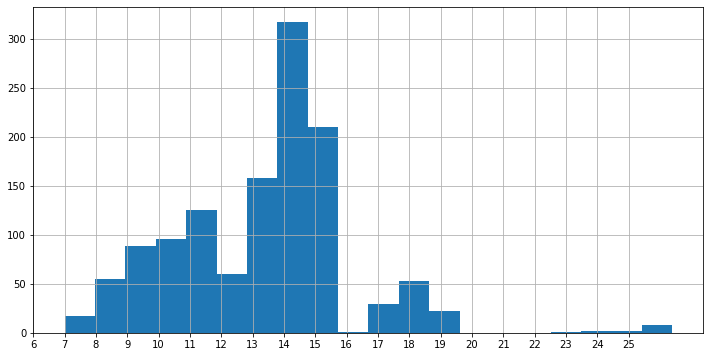

In [8]:
fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(12,6))
plt.hist(np.log10(list(freq_list['freq'])) , bins=20)
#plt.xlim(0.0e24 , 0.5e26)
#plt.yscale('log')
#plt.xscale()
plt.xticks(np.linspace(6.0 , 25.0 , 20))
plt.grid()
plt.show()

take average of (flux denisty , upper limit and lowerlimit)

take average rowwise for same frequency differnet measurments

,Unnamed: 0,freq,flux_density,photometry
0,0,1.210000e+18,2.695000e-11,3.260000e-16
1,0,1.030000e+18,4.335000e-10,4.465000e-15
2,0,1.000000e+18,2.630000e-08,2.630000e-13
3,0,9.190000e+17,4.370000e-10,4.015950e-15
4,0,5.560000e+17,5.115000e-10,2.844700e-15
5,0,3.770000e+17,2.120000e-10,7.995350e-16
6,0,3.630000e+17,7.050000e-10,2.556000e-15
7,0,3.020000e+17,4.010000e-10,1.211000e-15
8,0,2.220000e+17,1.860000e-11,4.133550e-17
9,0,9.670000e+16,2.225000e-10,2.152550e-16


15


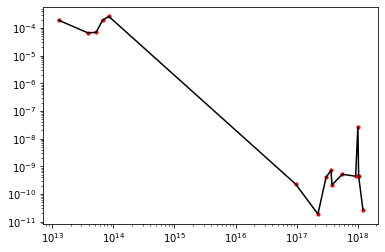

In [9]:
#cols = ['Frequency' , 'Flux Density' , 'Upper limit of Flux Density', 'Lower limit of Flux Density' , 'Photometry Measurement' , 'Uncertainty']
fname = '2CXO J004222.3+411345'
temp = (pd.read_csv('multi_wave_data_avg_v3/'+fname+'.csv'))
display(temp)
print(len(temp))
temp_v2 = temp.replace(np.nan , 0)
plt.scatter(temp['freq'] , temp['flux_density'] , s=10 , color='r')
plt.plot(temp['freq'] , temp['flux_density'] , color='k')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [21]:
cols = ['Frequency' , 'Flux Density' , 'Upper limit of Flux Density', 'Lower limit of Flux Density' , 'Photometry Measurement' , 'Uncertainty']
failed_files = []
for f in tqdm(flist['name'][:]):
    try:
        temp = (pd.read_csv('multi_wave_data/'+f))[cols]
        #display(temp)
        mean_fd = temp[['Flux Density' , 'Upper limit of Flux Density', 'Lower limit of Flux Density']].mean(axis=1)
        mean_phot = temp[['Photometry Measurement' , 'Uncertainty']].replace('NaN',0 , regex=False)
        mean_phot['Uncertainty'] = mean_phot['Uncertainty'].replace(np.nan , "0" ,)
        mean_phot['Uncertainty'] = mean_phot['Uncertainty'].str.replace("+/-" , "0*" , regex=False)
        mean_phot['Uncertainty'] = mean_phot['Uncertainty'].str.replace("<" , "" , regex=False)
        mean_phot['Uncertainty'] = mean_phot['Uncertainty'].str.replace(">" , "" , regex=False)
        mean_phot['Uncertainty'] = mean_phot['Uncertainty'].str.replace("%" , "" , regex=False)
        #display(mean_phot)
        mean_phot['Uncertainty'] = [0 if el[-1]=='*' else eval(el) for el in mean_phot['Uncertainty']]
        mean_phot = mean_phot.replace(0 , np.nan)
        mean_phot = mean_phot.mean(axis=1)
        temp_df = pd.DataFrame({
            "freq" : temp['Frequency'] , 
            "flux_density" : mean_fd.to_list(),
            "photometry" : mean_phot.to_list()
        })
        #display(temp_df)
        uniq_freq = temp_df['freq'].unique()
        small_df_list = []
        for u in uniq_freq:
            small_df_list.append(temp_df[temp_df['freq']==u].mean(axis=0).to_frame().T)
            #display(small_df)
        #display(temp_df)
        small_df = pd.concat(small_df_list, axis=0)
        small_df.to_csv('multi_wave_data_avg_v3/'+f)
    except Exception as e:
        print("some error with " + f)
        failed_files.append(f)
        print(e)

    #display(small_df)

 30%|██▉       | 3079/10356 [01:39<03:34, 33.88it/s]

some error with 2CXO J061536.3+710215.csv
string index out of range


 69%|██████▉   | 7196/10356 [04:33<01:38, 32.14it/s]

some error with 2CXO J125614.2+565225.csv
string index out of range


 77%|███████▋  | 7977/10356 [05:01<01:18, 30.49it/s]

some error with 2CXO J142438.1+225600.csv
string index out of range


100%|██████████| 10356/10356 [06:26<00:00, 26.78it/s]


In [22]:
cols = ['Frequency' , 'Flux Density' , 'Upper limit of Flux Density', 'Lower limit of Flux Density' , 'Photometry Measurement' , 'Uncertainty']
for f in tqdm(failed_files):
    #print(f)
    temp = (pd.read_csv('multi_wave_data/'+f))[cols]
    #display(temp)
    mean_fd = temp[['Flux Density' , 'Upper limit of Flux Density', 'Lower limit of Flux Density']].mean(axis=1)
    mean_phot = temp[['Photometry Measurement' , 'Uncertainty']].replace('NaN',0 , regex=False)
    mean_phot['Uncertainty'] = mean_phot['Uncertainty'].replace(np.nan , "0" ,)
    mean_phot['Uncertainty'] = mean_phot['Uncertainty'].str.replace("+/-" , "0*" , regex=False)
    mean_phot['Uncertainty'] = mean_phot['Uncertainty'].str.replace("<" , "" , regex=False)
    mean_phot['Uncertainty'] = mean_phot['Uncertainty'].str.replace(">" , "" , regex=False)
    mean_phot['Uncertainty'] = mean_phot['Uncertainty'].str.replace("%" , "" , regex=False)
    #display(mean_phot)
    mean_phot.to_csv('temp_files/mean_phot.csv',)
    #mean_phot['Uncertainty'] = [0 if (el[-1]=='*' or el=='') else eval(el) for el in mean_phot['Uncertainty']]
    i = 0
    mean_phot_unc = []
    for el in (mean_phot['Uncertainty'][:]):
        #print(el)
        i+=1
        try:
            if(el==''):
                mean_phot_unc.append(0)
            elif(el[-1]=='*'):
                mean_phot_unc.append(0)
            else:
         #       print(eval(el))
                mean_phot_unc.append(eval(el))
         #       print(mean_phot_unc)
         #       print('----------')
        except Exception as e:
            print('error')
            print(i)
            print(f)
            print(e)
    mean_phot = mean_phot.replace(0 , np.nan)
    mean_phot = mean_phot.mean(axis=1)
    temp_df = pd.DataFrame({
        "freq" : temp['Frequency'] , 
        "flux_density" : mean_fd.to_list(),
        "photometry" : mean_phot.to_list()
    })
    #display(temp_df)
    uniq_freq = temp_df['freq'].unique()
    small_df_list = []
    for u in uniq_freq:
        small_df_list.append(temp_df[temp_df['freq']==u].mean(axis=0).to_frame().T)
        #display(small_df)
    #display(temp_df)
    small_df = pd.concat(small_df_list, axis=0)
    small_df.to_csv('multi_wave_data_avg_v3/'+f)

    #display(small_df)

100%|██████████| 3/3 [00:00<00:00,  5.22it/s]


In [23]:
from freq_dict import freq_dict
freq_dict

{'2-10XMM': 1.45e+18,
 '2-7-CHANDRA': 1e+18,
 '0.5-7-CHANDRA': 5.56e+17,
 '0.2-0.5-CHANDRA': 9.67e+16,
 '0.5-1.2-CHANDRA': 2.22e+17,
 '1.2-2.0-CHANDRA': 3.77e+17,
 'FUV': 1950000000000000.0,
 'NUV': 1290000000000000.0,
 'W1': 89400000000000.0,
 'W2': 65100000000000.0,
 'W3': 25900000000000.0,
 'W4': 13600000000000.0,
 '8.4GHz': 8400000000.0,
 '4.85GHz': 4850000000.0,
 '1.4GHz': 1400000000.0,
 'u': 836000000000000.0,
 'g': 617000000000000.0,
 'r': 477000000000000.0,
 'i': 389000000000000.0,
 'z': 325000000000000.0,
 'U_n': 844000000000000.0,
 'G': 627000000000000.0,
 'R': 439000000000000.0,
 'J': 240000000000000.0,
 'J-CTIO': 243000000000000.0,
 'H': 182000000000000.0,
 'K': 138000000000000.0,
 '5.8mcIRAC': 52300000000000.0}

In [80]:
df_ch = pd.read_csv('data_v2/all_final.csv').iloc[:,1:]
df_ch = df_ch.append(pd.read_csv('data_v2/csc_lmxb.csv').iloc[:,1:]).reset_index(drop=True)
df_ch = df_ch.append(pd.read_csv('data_v2/csc_cv.csv').iloc[:,1:]).reset_index(drop=True)
df_ch

,csc_index,class,catalog,cat_name,cat_ra,cat_dec,offset,name,ra,dec,...,var_inter_hard_prob_ms,var_intra_index_b,var_intra_prob_b,ks_intra_prob_b,kp_intra_prob_b,var_inter_index_b,var_inter_prob_b,var_inter_sigma_b,gal_l2,gal_b2
0,CSC_266442,ULX,ULX,NGC 720 ULX7,28.278125,-13.759639,0.026647,2CXO J015306.7-134534,28.278130,-13.759645,...,0.989751,0.0,0.469837,0.808021,0.790976,7.0,0.996535,7.654814e-07,173.116593,-70.354424
1,CSC_267347,ULX,ULX,NGC 6946 ULX3,308.753083,60.191889,0.026800,2CXO J203500.7+601130,308.753085,60.191882,...,0.964283,0.0,0.039824,0.883976,0.979189,8.0,1.000000,6.207216e-05,95.760900,11.680480
2,CSC_98530,ULX,ULX,NGC 3256 ULX9,156.969000,-43.897194,0.060782,2CXO J102752.5-435349,156.968995,-43.897178,...,NaN,0.0,0.233821,0.230194,0.647446,NaN,NaN,NaN,277.372143,11.735167
3,CSC_248544,ULX,ULX,NGC 5194/5 ULX7,202.504250,47.228889,0.081766,2CXO J133001.0+471343,202.504217,47.228886,...,0.895074,10.0,1.000000,1.000000,1.000000,8.0,1.000000,7.935733e-05,104.830222,68.520409
4,CSC_248441,ULX,ULX,NGC 5194/5 ULX5,202.473833,47.243306,0.084040,2CXO J132953.7+471435,202.473842,47.243283,...,0.461574,0.0,0.128520,0.899500,0.921229,8.0,1.000000,1.126136e-05,104.897659,68.515639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10469,CSC_180496,CV,OPENCV,MACHO 119.20610.3305,271.143625,-30.086556,9.891376,2CXO J180435.2-300514,271.146681,-30.087302,...,NaN,2.0,0.810897,0.948133,0.872286,5.0,0.732443,1.035937e-07,1.085606,-4.144022
10470,CSC_222392,CV,OPENCV,M81N 2005-11a,148.864708,69.082583,9.979973,2CXO J095525.6+690458,148.856986,69.082873,...,0.817121,1.0,0.613486,0.774351,0.815843,5.0,0.946181,2.562799e-06,142.081301,40.880813
10471,CSC_208579,CV,OPENCV,M31N 2006-09b,10.672708,41.245722,9.983854,2CXO J004242.3+411445,10.676384,41.245957,...,0.174638,6.0,0.954684,0.983803,0.994638,5.0,0.992622,2.806879e-05,121.166702,-21.595860
10472,CSC_193299,CV,OPENCV,Nova 35,187.721583,12.383631,9.985442,2CXO J123053.8+122301,187.724420,12.383753,...,0.902406,0.0,0.071775,0.945576,0.929628,8.0,1.000000,4.020426e-06,283.850419,74.489510


In [81]:
df_ch['class'].value_counts()

AGN       6136
STAR      2519
CV         492
LMXB       397
YSO        282
PULSAR     275
ULX        203
HMXB       170
Name: class, dtype: int64

In [82]:
chandra_feat = [
    'name' , 
    'csc_index' , 
    "catalog",
    'class' , 
    'cat_name' , 
    'var_flag' , 
    'streak_src_flag' , 
    'pileup_flag',
    'ra' ,
    'dec',
    'gal_b2',
    'gal_l2',
    'hard_hs',
    'hard_hm',
    'hard_ms',
    'var_inter_prob_b',
    'var_inter_sigma_b',
    'var_intra_prob_b',
    'var_inter_index_b',
    'kp_intra_prob_b',
    'var_intra_index_b',
    'var_inter_hard_prob_hs',
    'ks_intra_prob_b',
    'var_inter_hard_sigma_hm',
    'var_inter_hard_prob_ms',
    'var_inter_hard_prob_hm']

In [10]:
freq_list

,Unnamed: 0,band,freq,unit
0,0,2-7 keV Chandra,9.190000e+17,erg/cm^2/s
1,1,0.5-7 keV Chandra,5.560000e+17,erg/cm^2/s
2,2,1.2-2 keV Chandra,3.770000e+17,erg/cm^2/s
3,3,0.5-1.2 keV Chandra,2.220000e+17,erg/cm^2/s
4,4,0.2-0.5 keV Chandra,9.670000e+16,erg/cm^2/s
...,...,...,...,...
1240,1240,238 GHz (ESO),2.380000e+11,Jy
1241,1241,863 MHz (ASKAP),8.630000e+08,milliJy
1242,1242,2.14 mm (NIKA),1.400000e+11,milliJy
1243,1243,0.3-1 keV (XMM),1.570000e+17,erg/cm^2^/s


In [15]:
freq_dense = pd.read_csv('bands_sparsity.csv').iloc[:,1:]
freq_dense = freq_dense[freq_dense['percent_available']>15]
freq_dense = freq_dense.rename(columns= {"column_name" : 'band'}).sort_values('band').reset_index(drop=True)
#freq_dense = freq_dense.set_index('band')
freq_dense.to_csv('dense_freq.csv')
freq_dense

,band,percent_available
0,0.2-0.5 keV Chandra,96.153846
1,0.3-8 keV (Chandra),79.895105
2,0.5-1.2 keV Chandra,95.489510
3,0.5-2 keV (Chandra),21.748252
4,0.5-7 keV Chandra,96.783217
5,0.5-8 keV (Chandra),15.384615
6,1-2 keV (Chandra),34.090909
7,1.2-2 keV Chandra,94.755245
8,2-10 keV (XMM),17.377622
9,2-7 keV Chandra,82.832168


In [17]:
freq_list_fill = freq_list[freq_list['band'].isin(freq_dense['band'])].iloc[: , 1:]
freq_list_fill =  freq_list_fill.drop_duplicates(['band']).reset_index(drop=True)
freq_list_fill.to_csv('dense_freq.csv')
freq_list_fill

,band,freq,unit
0,2-7 keV Chandra,9.190000e+17,erg/cm^2/s
1,0.5-7 keV Chandra,5.560000e+17,erg/cm^2/s
2,1.2-2 keV Chandra,3.770000e+17,erg/cm^2/s
3,0.5-1.2 keV Chandra,2.220000e+17,erg/cm^2/s
4,0.2-0.5 keV Chandra,9.670000e+16,erg/cm^2/s
5,0.3-8 keV (Chandra),1.000000e+18,erg/cm^2^/s
6,0.5-2 keV (Chandra),3.020000e+17,erg/cm^2^/s
7,FUV (GALEX) AB,1.950000e+15,mag
8,NUV (GALEX) AB,1.290000e+15,mag
9,u (SDSS PSF) AB,8.360000e+14,asinh mag


In [94]:
df_mw_list = []
for f in tqdm(flist['name'][:]):
    temp_dict = {k : np.nan for k in ['name']+list(freq_list_fill['band']) }
    fd = (pd.read_csv('multi_wave_data_avg_v3/'+f)).iloc[:,1:]
    temp_dict['name'] =  f[:-4]
    #for fqn , fqv in zip(freq_dict.keys() , freq_dict.values()):
    for fqn , fqv in zip(freq_list_fill['band'] , freq_list_fill['freq']):
        t = fd[fd['freq']==fqv]
        if(len(t)>0):
            temp_dict[fqn] =  t.iloc[0]['photometry']
            #display(t.iloc[0]['flux_density'])
    #display(temp_dict)
    df_mw_list.append(temp_dict)
df_mw_final = pd.DataFrame(df_mw_list)
display(df_mw_final)
df_mw_final.to_csv('temp_files/df_mw_final.csv')

100%|██████████| 10356/10356 [02:51<00:00, 60.31it/s]


,name,2-7 keV Chandra,0.5-7 keV Chandra,1.2-2 keV Chandra,0.5-1.2 keV Chandra,0.2-0.5 keV Chandra,0.3-8 keV (Chandra),0.5-2 keV (Chandra),FUV (GALEX) AB,NUV (GALEX) AB,...,4.5 microns (IRAC),8.0 microns (IRAC),24 microns (MIPS),J (2MASS/CTIO),H (2MASS/CTIO),K_s (2MASS/CTIO),0.5-8 keV (Chandra),3.6 microns (IRAC),5.8 microns (IRAC),1-2 keV (Chandra)
0,2CXO J000002.8-251139,2.993250e-10,6.011000e-14,3.169250e-14,4.521800e-15,2.870750e-14,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2CXO J000002.9-350332,9.599050e-14,3.394450e-13,1.202650e-13,6.936900e-14,1.530250e-13,8.490000e-13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2CXO J000009.3+135618,NaN,3.155000e-15,1.649750e-15,5.941550e-16,2.521750e-15,NaN,1.700000e-15,23.035833,20.677475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2CXO J000015.4+005246,NaN,4.516100e-14,1.483900e-14,4.466450e-15,2.698250e-14,NaN,NaN,24.482450,21.775200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2CXO J000021.0-250812,NaN,8.675350e-14,2.008800e-14,2.266450e-14,4.666400e-14,NaN,NaN,NaN,NaN,...,201.2900,290.77000,1122.20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10351,2CXO J235933.4-250758,NaN,3.310350e-14,1.575750e-14,2.288550e-15,1.937850e-14,NaN,1.006000e-14,NaN,NaN,...,62.0565,66.90650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10352,2CXO J235939.7-250056,NaN,1.460450e-14,1.209370e-15,3.159800e-15,1.086450e-14,NaN,1.130000e-14,NaN,NaN,...,244.7935,453.73525,1251.04025,NaN,NaN,NaN,NaN,167.68045,362.48425,NaN
10353,2CXO J235953.4-093655,4.452350e-14,7.675750e-14,2.342650e-14,1.992150e-14,3.611050e-14,1.390000e-13,NaN,NaN,NaN,...,490.2800,928.01500,5781.80000,16.978,16.3395,15.365,NaN,415.07000,650.96500,NaN
10354,2CXO J235953.6-124148,NaN,6.633600e-14,2.089350e-15,2.769350e-15,6.287300e-14,2.500000e-14,2.000000e-14,23.011650,20.379400,...,NaN,NaN,NaN,14.443,14.2050,13.706,NaN,NaN,NaN,NaN


In [95]:
df_ch_small = df_ch[chandra_feat]
df_ch_small = df_ch_small.set_index('name')
df_ch_small

,csc_index,catalog,class,cat_name,var_flag,streak_src_flag,pileup_flag,ra,dec,gal_b2,...,var_inter_sigma_b,var_intra_prob_b,var_inter_index_b,kp_intra_prob_b,var_intra_index_b,var_inter_hard_prob_hs,ks_intra_prob_b,var_inter_hard_sigma_hm,var_inter_hard_prob_ms,var_inter_hard_prob_hm
name,,,,,,,,,,,,,,,,,,,,,
2CXO J015306.7-134534,CSC_266442,ULX,ULX,NGC 720 ULX7,1,0,0,28.278130,-13.759645,-70.354424,...,7.654814e-07,0.469837,7.0,0.790976,0.0,0.993557,0.808021,0.719463,0.989751,0.467179
2CXO J203500.7+601130,CSC_267347,ULX,ULX,NGC 6946 ULX3,1,0,0,308.753085,60.191882,11.680480,...,6.207216e-05,0.039824,8.0,0.979189,0.0,0.963273,0.883976,0.036072,0.964283,0.344090
2CXO J102752.5-435349,CSC_98530,ULX,ULX,NGC 3256 ULX9,0,0,0,156.968995,-43.897178,11.735167,...,NaN,0.233821,NaN,0.647446,0.0,NaN,0.230194,NaN,NaN,NaN
2CXO J133001.0+471343,CSC_248544,ULX,ULX,NGC 5194/5 ULX7,1,0,0,202.504217,47.228886,68.520409,...,7.935733e-05,1.000000,8.0,1.000000,10.0,0.967804,1.000000,0.087087,0.895074,0.204341
2CXO J132953.7+471435,CSC_248441,ULX,ULX,NGC 5194/5 ULX5,1,0,0,202.473842,47.243283,68.515639,...,1.126136e-05,0.128520,8.0,0.921229,0.0,0.990235,0.899500,0.110960,0.461574,0.739942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J180435.2-300514,CSC_180496,OPENCV,CV,MACHO 119.20610.3305,0,0,0,271.146681,-30.087302,-4.144022,...,1.035937e-07,0.810897,5.0,0.872286,2.0,NaN,0.948133,NaN,NaN,NaN
2CXO J095525.6+690458,CSC_222392,OPENCV,CV,M81N 2005-11a,0,0,0,148.856986,69.082873,40.880813,...,2.562799e-06,0.613486,5.0,0.815843,1.0,0.547361,0.774351,0.542127,0.817121,0.760934
2CXO J004242.3+411445,CSC_208579,OPENCV,CV,M31N 2006-09b,1,0,0,10.676384,41.245957,-21.595860,...,2.806879e-05,0.954684,5.0,0.994638,6.0,0.694599,0.983803,0.603785,0.174638,0.785973


In [96]:
df_mw_final = df_mw_final.reset_index()
df_mw_flux =  df_mw_final.set_index('name')
df_mw_flux

,index,2-7 keV Chandra,0.5-7 keV Chandra,1.2-2 keV Chandra,0.5-1.2 keV Chandra,0.2-0.5 keV Chandra,0.3-8 keV (Chandra),0.5-2 keV (Chandra),FUV (GALEX) AB,NUV (GALEX) AB,...,4.5 microns (IRAC),8.0 microns (IRAC),24 microns (MIPS),J (2MASS/CTIO),H (2MASS/CTIO),K_s (2MASS/CTIO),0.5-8 keV (Chandra),3.6 microns (IRAC),5.8 microns (IRAC),1-2 keV (Chandra)
name,,,,,,,,,,,,,,,,,,,,,
2CXO J000002.8-251139,0,2.993250e-10,6.011000e-14,3.169250e-14,4.521800e-15,2.870750e-14,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J000002.9-350332,1,9.599050e-14,3.394450e-13,1.202650e-13,6.936900e-14,1.530250e-13,8.490000e-13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J000009.3+135618,2,NaN,3.155000e-15,1.649750e-15,5.941550e-16,2.521750e-15,NaN,1.700000e-15,23.035833,20.677475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J000015.4+005246,3,NaN,4.516100e-14,1.483900e-14,4.466450e-15,2.698250e-14,NaN,NaN,24.482450,21.775200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J000021.0-250812,4,NaN,8.675350e-14,2.008800e-14,2.266450e-14,4.666400e-14,NaN,NaN,NaN,NaN,...,201.2900,290.77000,1122.20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J235933.4-250758,10351,NaN,3.310350e-14,1.575750e-14,2.288550e-15,1.937850e-14,NaN,1.006000e-14,NaN,NaN,...,62.0565,66.90650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J235939.7-250056,10352,NaN,1.460450e-14,1.209370e-15,3.159800e-15,1.086450e-14,NaN,1.130000e-14,NaN,NaN,...,244.7935,453.73525,1251.04025,NaN,NaN,NaN,NaN,167.68045,362.48425,NaN
2CXO J235953.4-093655,10353,4.452350e-14,7.675750e-14,2.342650e-14,1.992150e-14,3.611050e-14,1.390000e-13,NaN,NaN,NaN,...,490.2800,928.01500,5781.80000,16.978,16.3395,15.365,NaN,415.07000,650.96500,NaN


In [97]:
df_ch_small.iloc[df_mw_final.index]

,csc_index,catalog,class,cat_name,var_flag,streak_src_flag,pileup_flag,ra,dec,gal_b2,...,var_inter_sigma_b,var_intra_prob_b,var_inter_index_b,kp_intra_prob_b,var_intra_index_b,var_inter_hard_prob_hs,ks_intra_prob_b,var_inter_hard_sigma_hm,var_inter_hard_prob_ms,var_inter_hard_prob_hm
name,,,,,,,,,,,,,,,,,,,,,
2CXO J015306.7-134534,CSC_266442,ULX,ULX,NGC 720 ULX7,1,0,0,28.278130,-13.759645,-70.354424,...,7.654814e-07,0.469837,7.0,0.790976,0.0,0.993557,0.808021,0.719463,0.989751,0.467179
2CXO J203500.7+601130,CSC_267347,ULX,ULX,NGC 6946 ULX3,1,0,0,308.753085,60.191882,11.680480,...,6.207216e-05,0.039824,8.0,0.979189,0.0,0.963273,0.883976,0.036072,0.964283,0.344090
2CXO J102752.5-435349,CSC_98530,ULX,ULX,NGC 3256 ULX9,0,0,0,156.968995,-43.897178,11.735167,...,NaN,0.233821,NaN,0.647446,0.0,NaN,0.230194,NaN,NaN,NaN
2CXO J133001.0+471343,CSC_248544,ULX,ULX,NGC 5194/5 ULX7,1,0,0,202.504217,47.228886,68.520409,...,7.935733e-05,1.000000,8.0,1.000000,10.0,0.967804,1.000000,0.087087,0.895074,0.204341
2CXO J132953.7+471435,CSC_248441,ULX,ULX,NGC 5194/5 ULX5,1,0,0,202.473842,47.243283,68.515639,...,1.126136e-05,0.128520,8.0,0.921229,0.0,0.990235,0.899500,0.110960,0.461574,0.739942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J004242.1+411608,CSC_208574,OPENCV,CV,EV_ M31 V0886,1,0,0,10.675742,41.268942,-21.572873,...,3.173093e-04,0.234484,8.0,0.881192,0.0,0.793892,0.894651,0.734903,0.878967,0.011440
2CXO J033629.2-345729,CSC_226806,OPENCV,CV,NGC1380-S5,0,0,0,54.121764,-34.958247,-54.053323,...,4.330416e-08,0.462664,5.0,0.554636,0.0,NaN,0.809365,NaN,NaN,NaN
2CXO J073654.2+653208,CSC_272566,OPENCV,CV,N2403 2005-12a,0,0,0,114.226067,65.535556,29.188510,...,8.751965e-07,0.379085,8.0,0.698773,0.0,0.815147,0.718209,0.504774,0.882257,0.508871


In [98]:
df_final = pd.merge( df_ch_small.iloc[df_mw_final.index] , df_mw_flux , left_index=True , right_index=True)
df_final

,csc_index,catalog,class,cat_name,var_flag,streak_src_flag,pileup_flag,ra,dec,gal_b2,...,4.5 microns (IRAC),8.0 microns (IRAC),24 microns (MIPS),J (2MASS/CTIO),H (2MASS/CTIO),K_s (2MASS/CTIO),0.5-8 keV (Chandra),3.6 microns (IRAC),5.8 microns (IRAC),1-2 keV (Chandra)
name,,,,,,,,,,,,,,,,,,,,,
2CXO J000002.8-251139,CSC_50147,VERONCAT,AGN,XMM J00000-2511,0,0,0,0.011846,-25.194360,-78.313068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J000002.9-350332,CSC_7959,VERONCAT,AGN,MS 23574-3520,0,0,0,0.012318,-35.059068,-76.457962,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J000009.3+135618,CSC_50160,VERONCAT,AGN,SDSS J00001+1356,0,0,0,0.039115,13.938493,-47.088916,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J000015.4+005246,CSC_7965,VERONCAT,AGN,SDSS J00002+0052,0,0,0,0.064509,0.879593,-59.404999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J000021.0-250812,CSC_50177,VERONCAT,AGN,XMM J00003-2508,1,0,0,0.087880,-25.136909,-78.367846,...,201.2900,290.77000,1122.20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J235933.4-250758,CSC_161698,VERONCAT,AGN,XMM J23595-2507,0,0,0,359.889233,-25.132779,-78.191434,...,62.0565,66.90650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J235939.7-250056,CSC_161729,VERONCAT,AGN,XMM J23596-2500,0,0,0,359.915826,-25.015776,-78.188939,...,244.7935,453.73525,1251.04025,NaN,NaN,NaN,NaN,167.68045,362.48425,NaN
2CXO J235953.4-093655,CSC_161772,VERONCAT,AGN,SDSS J23598-0936,0,0,0,359.972659,-9.615479,-68.677462,...,490.2800,928.01500,5781.80000,16.978,16.3395,15.365,NaN,415.07000,650.96500,NaN


In [99]:
df_final.to_csv('all_mw_data_v4_phot.csv')

In [91]:
df_final.loc['2CXO J015306.7-134534']

csc_index                             CSC_266442
catalog                                      ULX
class                                        ULX
cat_name                   NGC 720 ULX7         
var_flag                                       1
streak_src_flag                                0
pileup_flag                                    0
ra                                       28.2781
dec                                     -13.7596
gal_b2                                  -70.3544
gal_l2                                   173.117
hard_hs                                 0.999375
hard_hm                                 0.264834
hard_ms                                 0.999375
var_inter_prob_b                        0.996535
var_inter_sigma_b                    7.65481e-07
var_intra_prob_b                        0.469837
var_inter_index_b                              7
kp_intra_prob_b                         0.790976
var_intra_index_b                              0
var_inter_hard_prob_